In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "jairbolsonaro.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv(path, sep=';', date_parser=['created_at'])

In [4]:
df.head()

,id,created_at,text,retweet_count,favorite_count
0,1181330545277575170,2019-10-07 22:08:44,". Via Ministro da Justiça e Segurança Pública,...",6973,26499
1,1181323221532123145,2019-10-07 21:39:38,Inaugurada Unidade de Distribuição da Agricult...,3298,17123
2,1181304052065460224,2019-10-07 20:23:28,Via @BolsonaroSP : Acompanhando o @MEC_Comunic...,2482,12479
3,1181304052065460224,2019-10-07 20:23:28,Via @BolsonaroSP : Acompanhando o @MEC_Comunic...,2482,12479
4,1181267750716616704,2019-10-07 17:59:13,https://t.co/PQbqRXBnzL,3209,13490


In [5]:
df.describe()

,id,retweet_count,favorite_count
count,2.092000e+03,2092.000000,2092.000000
mean,1.127036e+18,5147.610421,33194.990440
std,2.962363e+16,3740.235902,25881.402927
min,1.079956e+18,7.000000,0.000000
25%,1.102549e+18,2682.500000,14645.000000
50%,1.124488e+18,4465.000000,31318.500000
75%,1.152023e+18,6998.250000,47731.750000
max,1.181331e+18,36954.000000,168674.000000


In [0]:
def convert(x):
  x = str(x)
  return f'{x[:4]}-{x[4:]}'

In [0]:
df['YearMonth'] = pd.to_datetime(df['created_at']).apply(lambda x: int(f'{x.year}{x.month}'))
df['YearMonthDay'] = pd.to_datetime(df['created_at']).apply(lambda x: int(f'{x.year}{x.month}{x.day}'))

In [0]:
res = df.groupby('YearMonth')['id'].count()

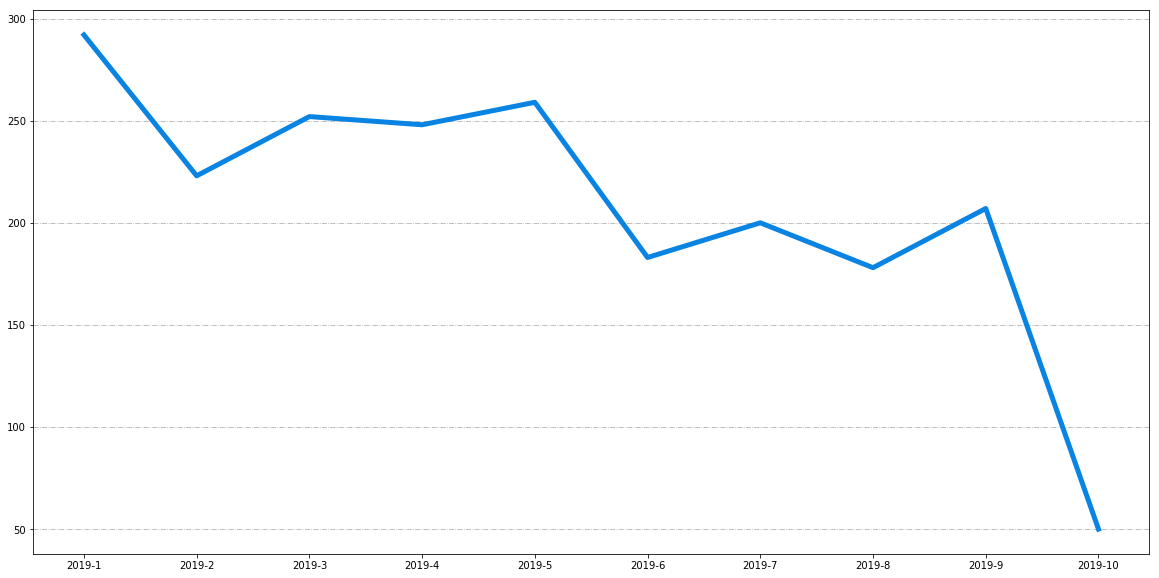

In [9]:
X = tuple(map(convert, res.index))
Y = res.values

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title(label='')

plt.plot(X, Y, linewidth=5, color='#0984e3')
plt.grid(True, axis='y', linestyle='-.')

In [10]:
X

('2019-1',
 '2019-2',
 '2019-3',
 '2019-4',
 '2019-5',
 '2019-6',
 '2019-7',
 '2019-8',
 '2019-9',
 '2019-10')

In [11]:
res.sum()

2092

In [12]:
df.id.count()

2092